# **Problem Statement**

Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks at least expense. AdEase is an advertisement foundation to assist organizations with advancing themselves effectively, successfully, and economically.

You are attempting to comprehend the per site visit report for various wikipedia pages for 550 days, and guaging the quantity of perspectives so you can foresee and enhance the promotion situation for your clients. You are given the information of 145k wikipedia pages and everyday view count for every one of them. Your clients have a place with various locales and need information on how their promotions will perform on pages in various languages.

# **Preprocessing and EDA**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
!gdown 1qQkymAitU6l2pSe702rDUhQpoP8MUZXl

Downloading...
From (original): https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl
From (redirected): https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl&confirm=t&uuid=9ef6bba7-09c1-47cd-b818-fac05ab74e6a
To: /content/train_1.csv
100% 278M/278M [00:05<00:00, 55.3MB/s]


In [13]:
df1=pd.read_csv("/content/train_1.csv")

**Observations on Data**

In [188]:
df1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [15]:
df1.shape

(145063, 551)

The dataset has 145063 rows and 551 columns

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [17]:
df1.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


**Missing Values**

In [18]:
df1.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

There are many Null values for the dates with respect to different pages And It could be because the pages must not have been visisted on that particular date

In [19]:
rowsna=df1.isna().sum(axis=1)

In [20]:
rows_with_null = df1[rowsna > 0]

In [21]:
rows_with_null.shape

(27786, 551)

There are 27786 pages with null values. These could be pages that were not visited frequently

In [22]:
rows_with_null50 = df1[rowsna > 250]

In [23]:
rows_with_null50.shape

(11511, 551)

In [24]:
rows_with_null70 = df1[rowsna > 350]

In [25]:
rows_with_null70.shape

(7531, 551)

There are almost 7531 pages with more than 350 dates as null and 11511 pages with more than 250 dates as null values

**Extraction of language code**

To analyse data in different Languages we need to extract Language code from dataset

In [26]:
df=df1.copy()

In [27]:
df['PAGE NAME'] = df1['Page'].str.split('_').str[-4::-1]
df['LANGUAGE'] = df1['Page'].str.split('_').str[-3].str.split('.').str[0]
df['ACCESS TYPE'] = df1['Page'].str.split('_').str[-2]
df['ACCESS ORIGIN'] = df1['Page'].str.split('_').str[-1]

In [28]:
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,PAGE NAME,LANGUAGE,ACCESS TYPE,ACCESS ORIGIN
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,[2NE1],zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,[2PM],zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,[3C],zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,[4minute],zh,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,11.0,27.0,13.0,36.0,10.0,"[You, Love, I, Hz, 52]",zh,all-access,spider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,12.0,13.0,3.0,5.0,10.0,"[películas), de, (serie, Underworld]",es,all-access,spider
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[Final, Capítulo, Evil:, Resident]",es,all-access,spider
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[Ramón, de, Enamorándome]",es,all-access,spider
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[hombre, último, el, Hasta]",es,all-access,spider


In [29]:
df.drop(columns=['Page'], inplace=True)

**Plotting the distribution**

In [31]:
df["LANGUAGE"].value_counts()

LANGUAGE
en         24108
ja         20431
de         18547
fr         17802
zh         17229
ru         15022
es         14069
commons    10555
www         7300
Name: count, dtype: int64

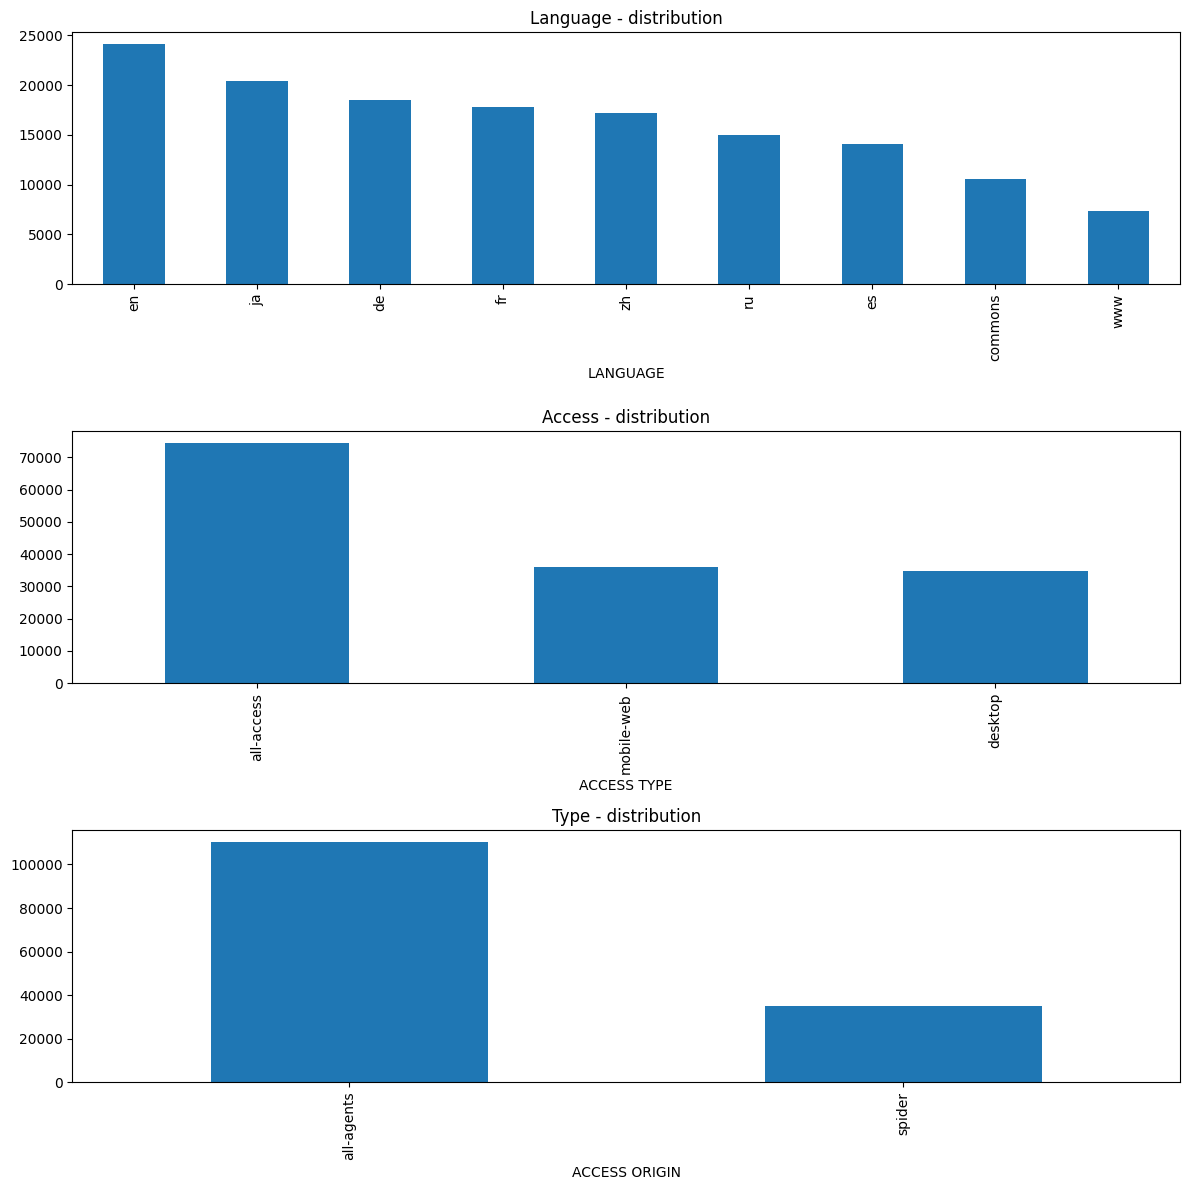

In [32]:
fig, ax  = plt.subplots(3,1,figsize=(12,12))

df["LANGUAGE"].value_counts().sort_values(ascending  = False).plot.bar(ax=ax[0])
ax[0].set_title('Language - distribution')

df["ACCESS TYPE"].value_counts().sort_values(ascending  = False).plot.bar(ax=ax[1])
ax[1].set_title('Access - distribution')

df["ACCESS ORIGIN"].value_counts().sort_values(ascending  = False).plot.bar(ax=ax[2])
ax[2].set_title('Type - distribution')

plt.tight_layout()

**Insights**

1.En webpages are the mostly viewed pages whereas es are the least viewed.<br>
2.All access would be prefered as with it, we are getting maximum no. of view counts.<br>
3.The distribution type is via all agents and is preferred as with it, we are getting most of the views unlike via spider distribution.<br>

**Aggregate and Pivoting**

Since we need to analyse data for different languages we perform groupby on languages and aggregate on sum for a particular date.

To use data for Time Series we need the date columns to become index Thus we Pivot the dataset

In [33]:
date_cols = df.iloc[:, :550]

In [34]:
date_cols

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
dates=df.columns[:550]

In [36]:
grouped_data = df.groupby("LANGUAGE")[dates].sum()

In [37]:
grouped_data

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
LANGUAGE,,,,,,,,,,,,,,,,,,,,,
commons,1140821.0,1178130.0,1150547.0,951317.0,1058036.0,1210059.0,1261832.0,1397039.0,1211829.0,1160388.0,...,2004241.0,2398507.0,1995233.0,2414296.0,2659227.0,2305363.0,2599015.0,2309293.0,2506163.0,2177323.0
de,13260519.0,13079896.0,12554042.0,11520379.0,13392347.0,14741758.0,14296292.0,14505194.0,13964778.0,13014478.0,...,15370604.0,15561414.0,15037095.0,23760349.0,22376548.0,20125264.0,19152389.0,18447906.0,17606030.0,16562720.0
en,84712190.0,84438545.0,80167728.0,83463204.0,86198637.0,92809436.0,87838054.0,82880196.0,84798911.0,84319456.0,...,120491573.0,112905341.0,119860920.0,123926291.0,139112120.0,145628731.0,141278366.0,150557534.0,125404585.0,123623809.0
es,15278553.0,14601013.0,13427632.0,12606538.0,13710356.0,15625554.0,15230654.0,14781870.0,14502906.0,13184481.0,...,13837820.0,13155676.0,12385052.0,12713363.0,16819231.0,15945353.0,16577375.0,15647135.0,11560095.0,11077924.0
fr,8458638.0,8512952.0,8186030.0,8749842.0,8590493.0,8949799.0,8650800.0,8491533.0,8403646.0,7930703.0,...,11606988.0,11383657.0,11005480.0,11867509.0,16678423.0,15281470.0,13781521.0,13399796.0,12471074.0,11504691.0
ja,11863200.0,13620792.0,12305383.0,15456239.0,14827204.0,12920547.0,12568828.0,12492787.0,12178258.0,12652904.0,...,13793066.0,19777366.0,17501297.0,16720214.0,15918093.0,16123301.0,16150715.0,17682688.0,19450687.0,24460799.0
ru,9463854.0,9627643.0,8923463.0,8393214.0,8938528.0,9628896.0,9408180.0,9364117.0,9592309.0,10984872.0,...,13465000.0,13292086.0,13133353.0,16839517.0,16717095.0,15040168.0,14000319.0,13478977.0,12066750.0,13223033.0
www,349713.0,383680.0,325714.0,308756.0,338485.0,391895.0,433312.0,372333.0,331655.0,399316.0,...,344084.0,545587.0,510962.0,522051.0,301517.0,320017.0,729836.0,320695.0,431709.0,392930.0
zh,4144988.0,4151189.0,4123659.0,4163448.0,4441286.0,4464290.0,4459421.0,4575842.0,4547843.0,4727889.0,...,5946850.0,5865102.0,6215165.0,6569812.0,6485813.0,6478442.0,6513400.0,6042545.0,6111203.0,6298565.0


In [38]:
grouped_data.reset_index(inplace=True)

In [39]:
melted_df = pd.melt(grouped_data, id_vars=['LANGUAGE'], var_name='date', value_name='value')
pvt_df = melted_df.pivot(index='date', columns='LANGUAGE', values='value')
pvt_df.reset_index(inplace=True)
pvt_df

LANGUAGE,date,commons,de,en,es,fr,ja,ru,www,zh
0,2015-07-01,1140821.0,13260519.0,84712190.0,15278553.0,8458638.0,11863200.0,9463854.0,349713.0,4144988.0
1,2015-07-02,1178130.0,13079896.0,84438545.0,14601013.0,8512952.0,13620792.0,9627643.0,383680.0,4151189.0
2,2015-07-03,1150547.0,12554042.0,80167728.0,13427632.0,8186030.0,12305383.0,8923463.0,325714.0,4123659.0
3,2015-07-04,951317.0,11520379.0,83463204.0,12606538.0,8749842.0,15456239.0,8393214.0,308756.0,4163448.0
4,2015-07-05,1058036.0,13392347.0,86198637.0,13710356.0,8590493.0,14827204.0,8938528.0,338485.0,4441286.0
...,...,...,...,...,...,...,...,...,...,...
545,2016-12-27,2305363.0,20125264.0,145628731.0,15945353.0,15281470.0,16123301.0,15040168.0,320017.0,6478442.0
546,2016-12-28,2599015.0,19152389.0,141278366.0,16577375.0,13781521.0,16150715.0,14000319.0,729836.0,6513400.0
547,2016-12-29,2309293.0,18447906.0,150557534.0,15647135.0,13399796.0,17682688.0,13478977.0,320695.0,6042545.0
548,2016-12-30,2506163.0,17606030.0,125404585.0,11560095.0,12471074.0,19450687.0,12066750.0,431709.0,6111203.0


In [40]:
pvt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     550 non-null    object 
 1   commons  550 non-null    float64
 2   de       550 non-null    float64
 3   en       550 non-null    float64
 4   es       550 non-null    float64
 5   fr       550 non-null    float64
 6   ja       550 non-null    float64
 7   ru       550 non-null    float64
 8   www      550 non-null    float64
 9   zh       550 non-null    float64
dtypes: float64(9), object(1)
memory usage: 43.1+ KB


In [41]:
pvt_df['date']=pd.to_datetime(pvt_df['date'])

In [42]:
pvt=pvt_df.copy()

In [43]:
pvt.columns.name

'LANGUAGE'

In [44]:
pvt.columns.name=None

In [45]:
pvt

,date,commons,de,en,es,fr,ja,ru,www,zh
0,2015-07-01,1140821.0,13260519.0,84712190.0,15278553.0,8458638.0,11863200.0,9463854.0,349713.0,4144988.0
1,2015-07-02,1178130.0,13079896.0,84438545.0,14601013.0,8512952.0,13620792.0,9627643.0,383680.0,4151189.0
2,2015-07-03,1150547.0,12554042.0,80167728.0,13427632.0,8186030.0,12305383.0,8923463.0,325714.0,4123659.0
3,2015-07-04,951317.0,11520379.0,83463204.0,12606538.0,8749842.0,15456239.0,8393214.0,308756.0,4163448.0
4,2015-07-05,1058036.0,13392347.0,86198637.0,13710356.0,8590493.0,14827204.0,8938528.0,338485.0,4441286.0
...,...,...,...,...,...,...,...,...,...,...
545,2016-12-27,2305363.0,20125264.0,145628731.0,15945353.0,15281470.0,16123301.0,15040168.0,320017.0,6478442.0
546,2016-12-28,2599015.0,19152389.0,141278366.0,16577375.0,13781521.0,16150715.0,14000319.0,729836.0,6513400.0
547,2016-12-29,2309293.0,18447906.0,150557534.0,15647135.0,13399796.0,17682688.0,13478977.0,320695.0,6042545.0
548,2016-12-30,2506163.0,17606030.0,125404585.0,11560095.0,12471074.0,19450687.0,12066750.0,431709.0,6111203.0


In [46]:
pvt.set_index('date', inplace=True)


In [189]:
pvt.head()

,de,en,es,fr,ja,ru,zh
date,,,,,,,
2015-07-01,13260519.0,84712190.0,15278553.0,8458638.0,11863200.0,9463854.0,4144988.0
2015-07-02,13079896.0,84438545.0,14601013.0,8512952.0,13620792.0,9627643.0,4151189.0
2015-07-03,12554042.0,80167728.0,13427632.0,8186030.0,12305383.0,8923463.0,4123659.0
2015-07-04,11520379.0,83463204.0,12606538.0,8749842.0,15456239.0,8393214.0,4163448.0
2015-07-05,13392347.0,86198637.0,13710356.0,8590493.0,14827204.0,8938528.0,4441286.0


**Time Series Plots**

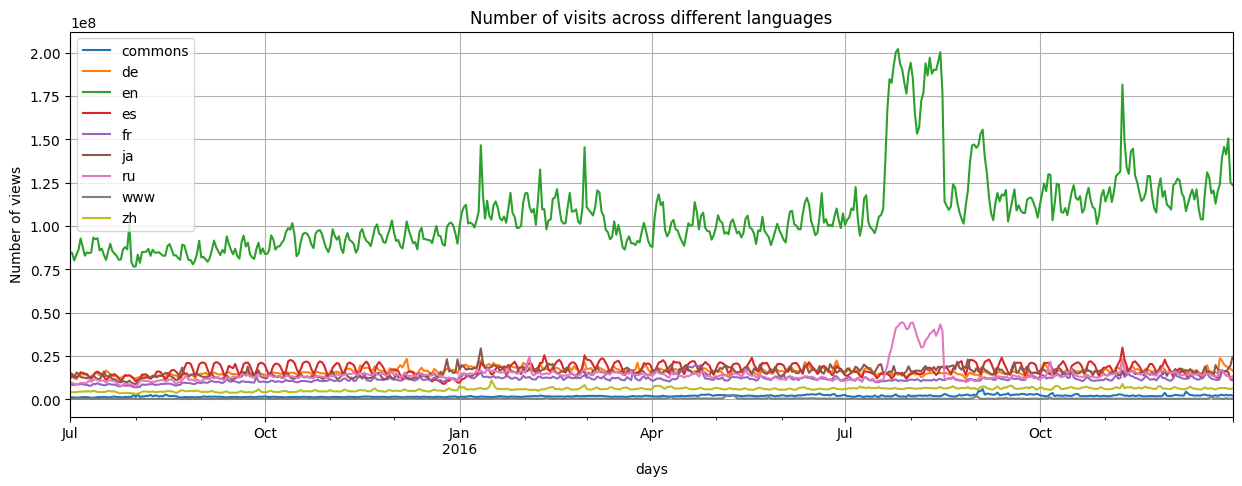

In [48]:
pvt.plot(kind='line',figsize=(15,5))
plt.grid()
plt.title("Number of visits across different languages")
plt.xlabel("days")
plt.ylabel("Number of views")
plt.show()

As we can see, during the month of August, 2016 we are seeing a huge spike in the number of views on the web pages for en and ru .These cold be outliers.

In [49]:
pvt.isna().sum()

commons    0
de         0
en         0
es         0
fr         0
ja         0
ru         0
www        0
zh         0
dtype: int64

 commons and www are not any languages so we drop them

In [50]:
pvt.drop(columns=['commons', 'www'], inplace=True)

**Outlier Handling**

From above Time Series plot we can observe that en and ru has outliers

In [51]:
pvt['en']=pvt['en'].clip(upper=pvt['en'].quantile(0.95))
pvt['ru']=pvt['ru'].clip(upper=pvt['en'].quantile(0.95))

**Stationarity test and decomposition**

Many models require Stationarity for accurate results hence we check for stationarity of our time series

In [52]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [53]:
def adf_test(dataset):
   pvalue = sm.tsa.stattools.adfuller(dataset)[1]
   print(pvalue)
   if pvalue <= 0.05:
      print('Sequence is stationary')
   else:
      print('Sequence is not stationary')


In [54]:
cols=pvt.columns

In [55]:
for i in cols:
    print(i)
    adf_test(pvt[i])
    print("__"*20)

de
0.14097382319729518
Sequence is not stationary
________________________________________
en
0.41724467868763804
Sequence is not stationary
________________________________________
es
0.03358859084479056
Sequence is stationary
________________________________________
fr
0.05149502195245248
Sequence is not stationary
________________________________________
ja
0.10257133898558563
Sequence is not stationary
________________________________________
ru
0.0018649376536621165
Sequence is stationary
________________________________________
zh
0.4474457922931181
Sequence is not stationary
________________________________________


de, en, fr, ja and zh are not stationary time series and es and ru are stationary time series

By breaking down a time series into its trend, seasonality, and residual components, we can gain valuable insights for forecasting, anomaly detection, and decision-making.

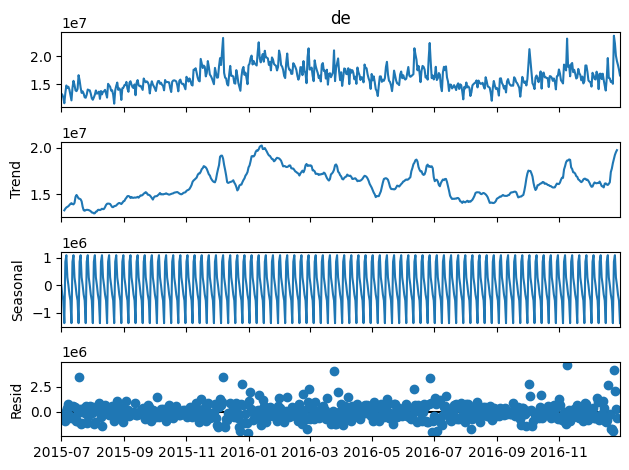

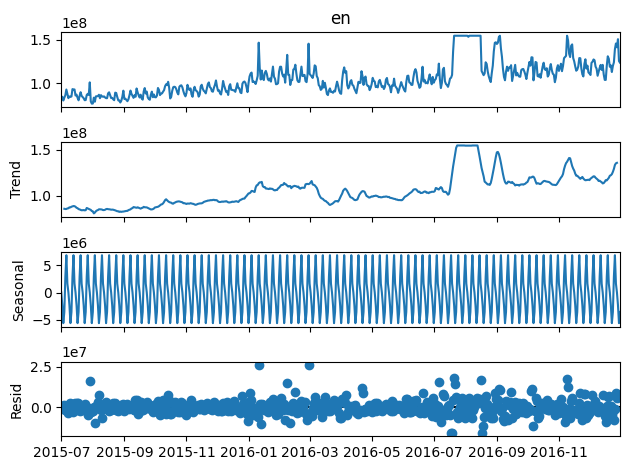

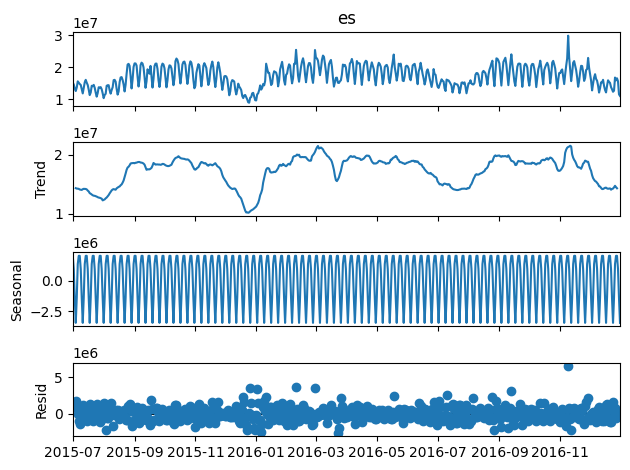

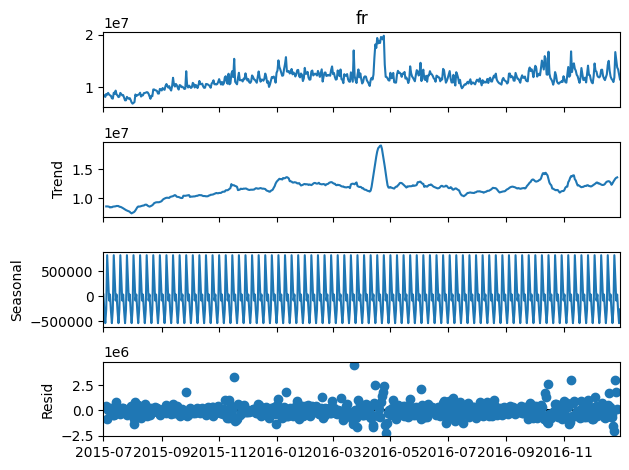

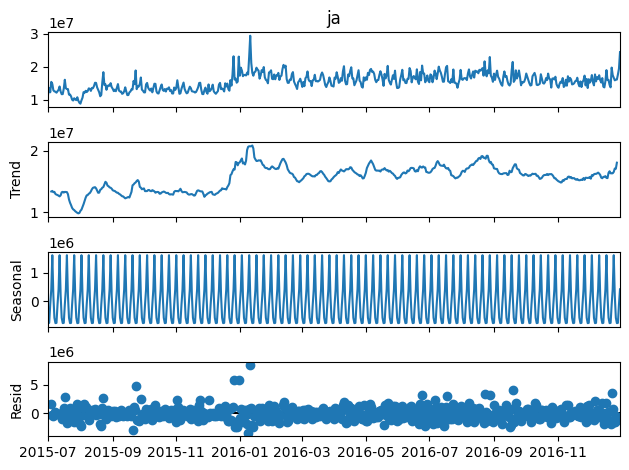

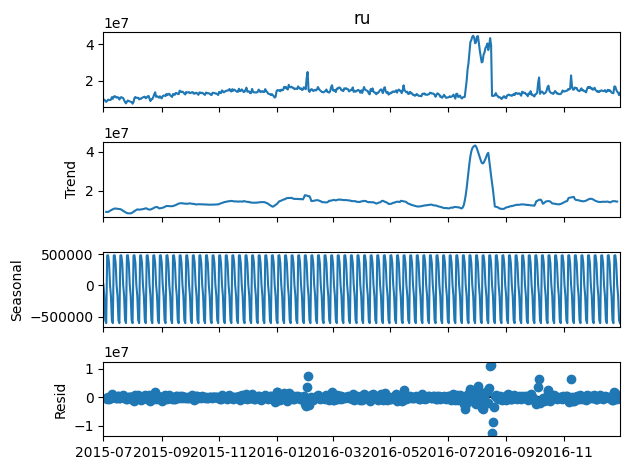

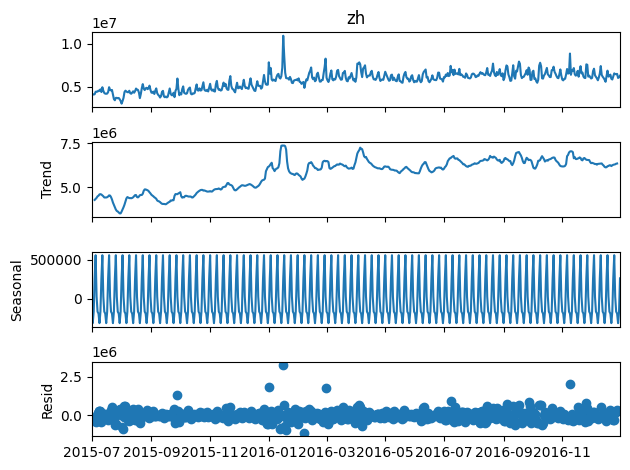

In [56]:
#additive decomposition
import statsmodels.api as sm

for i in cols:
    model = sm.tsa.seasonal_decompose(pvt[i], model='additive', period = 7)
    model.plot()
    plt.show()

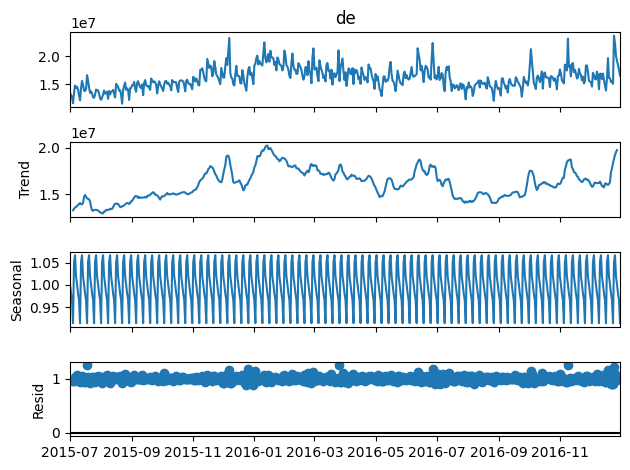

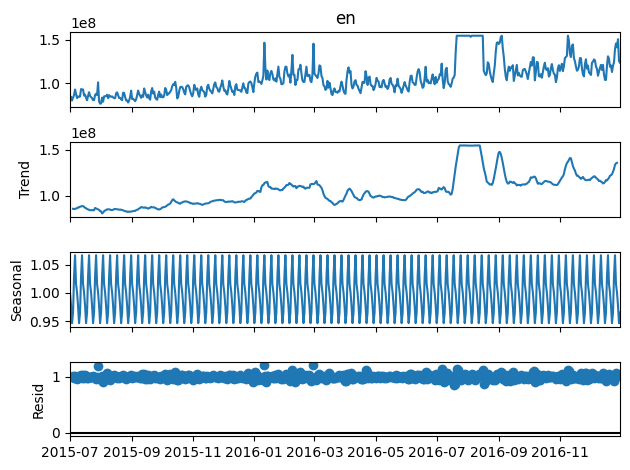

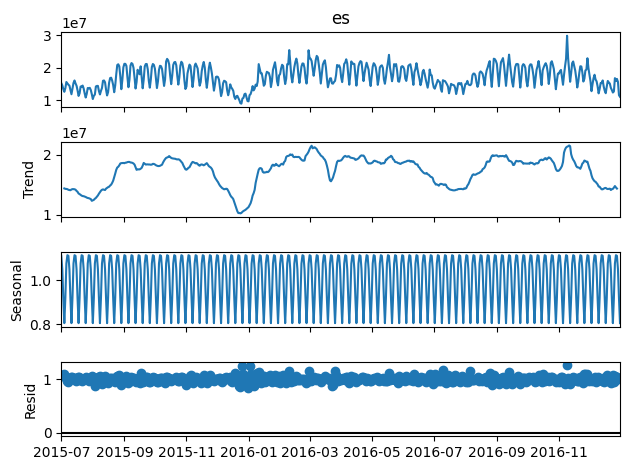

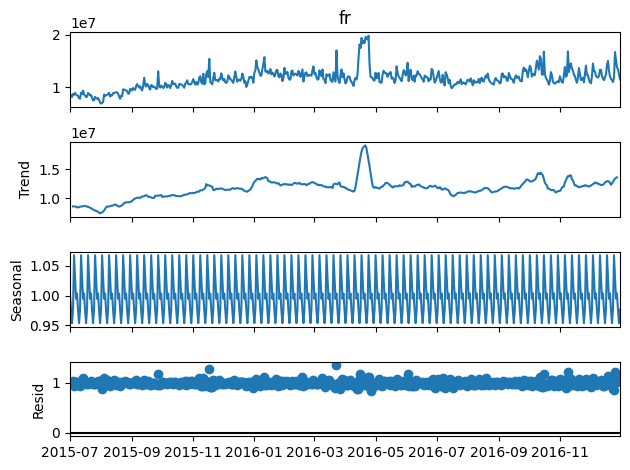

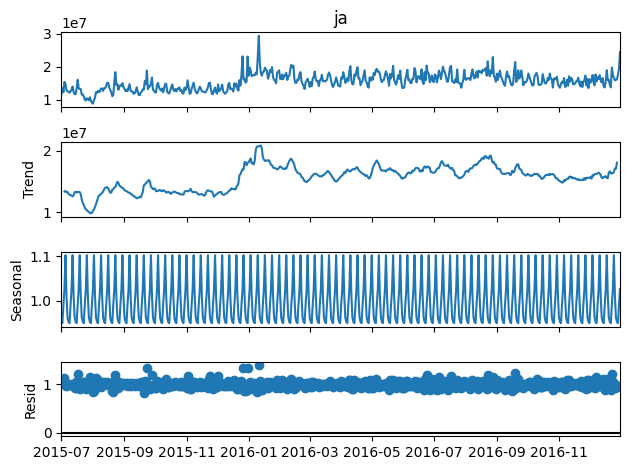

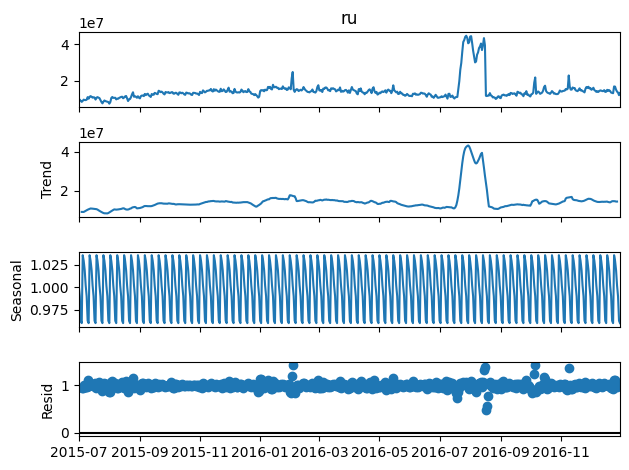

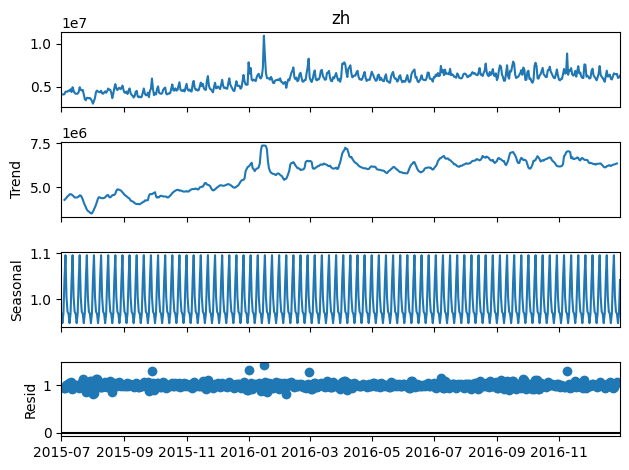

In [57]:
#multiplicative decomposition
for i in cols:
    model = sm.tsa.seasonal_decompose(pvt[i], model='multiplicative', period = 7)
    model.plot()
    plt.show()

In both additive and multiplicative decomposition it can be seen
*   de, en, fr, ja, zh and ru has an upward trend.

*   es doesnot show any trend.

*   All LanguagePages show Seasonality




### De-trending and de-seasoning

<Axes: xlabel='date'>

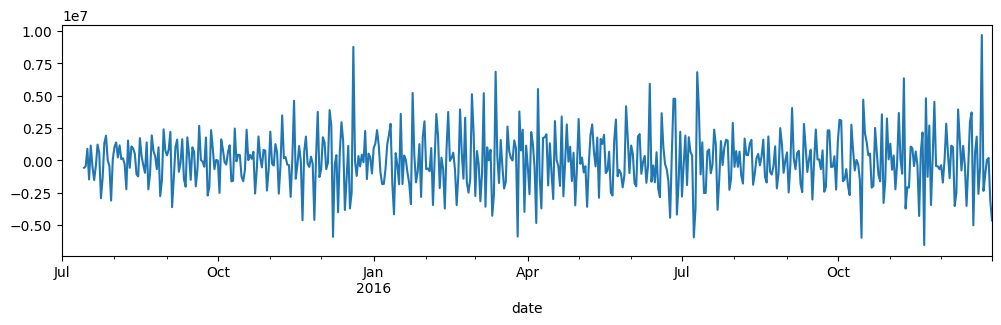

In [58]:
stationaryde = pvt['de'].diff(1).diff(12)
stationaryde.plot(figsize=(12,3))

In [59]:
adf_test(stationaryde.dropna())

2.6977020012312786e-14
Sequence is stationary


<Axes: xlabel='date'>

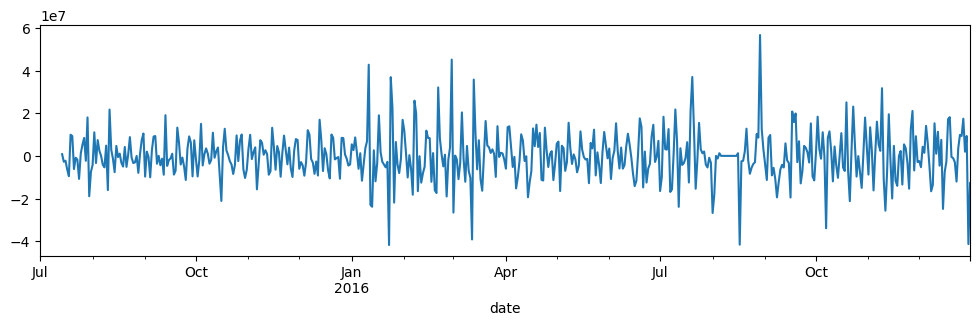

In [60]:
stationaryen = pvt['en'].diff(1).diff(12)
stationaryen.plot(figsize=(12,3))

In [61]:
adf_test(stationaryen.dropna())

3.613098195169971e-11
Sequence is stationary


<Axes: xlabel='date'>

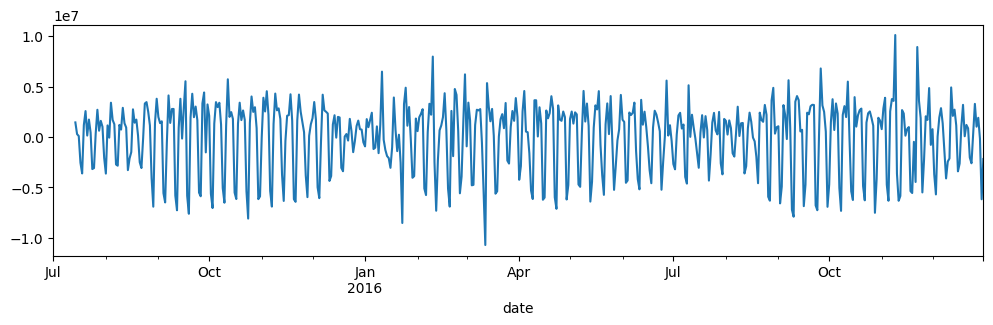

In [62]:
stationaryes = pvt['es'].diff(1).diff(12)
stationaryes.plot(figsize=(12,3))

In [63]:
adf_test(stationaryes.dropna())

8.939488576518637e-11
Sequence is stationary


<Axes: xlabel='date'>

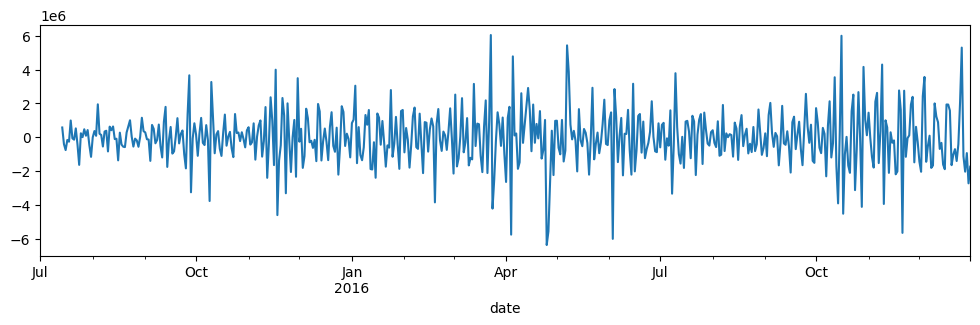

In [64]:
stationaryfr = pvt['fr'].diff(1).diff(12)
stationaryfr.plot(figsize=(12,3))

In [65]:
adf_test(stationaryfr.dropna())

1.2739210820187032e-14
Sequence is stationary


<Axes: xlabel='date'>

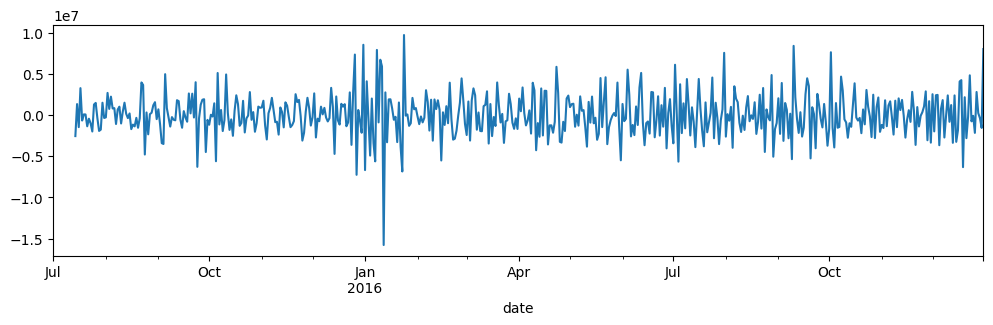

In [66]:
stationaryja = pvt['ja'].diff(1).diff(12)
stationaryja.plot(figsize=(12,3))

In [67]:
adf_test(stationaryja.dropna())

1.0152059587622815e-17
Sequence is stationary


<Axes: xlabel='date'>

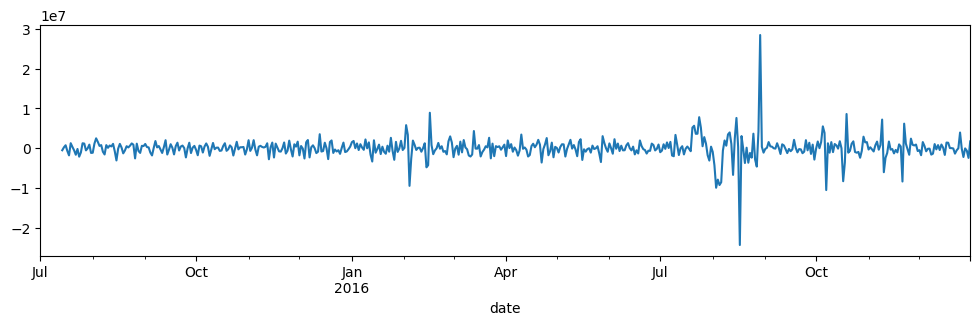

In [68]:
stationaryru = pvt['ru'].diff(1).diff(12)
stationaryru.plot(figsize=(12,3))

In [69]:
adf_test(stationaryru.dropna())

5.283957308505147e-12
Sequence is stationary


<Axes: xlabel='date'>

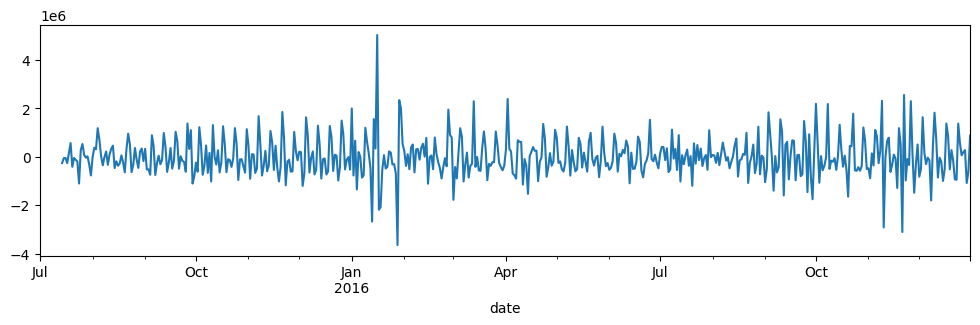

In [70]:
stationaryzh = pvt['zh'].diff(1).diff(12)
stationaryzh.plot(figsize=(12,3))

In [71]:
adf_test(stationaryzh.dropna())

4.0867330899547526e-16
Sequence is stationary


**ACF and PACF**

ACF plot with de-trended & de-season time series

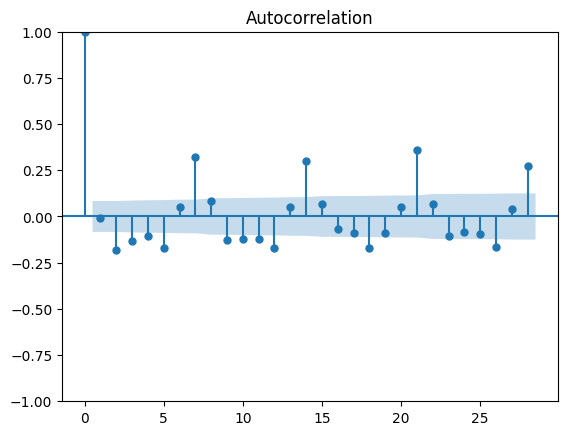

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(pvt['en'].diff().dropna());

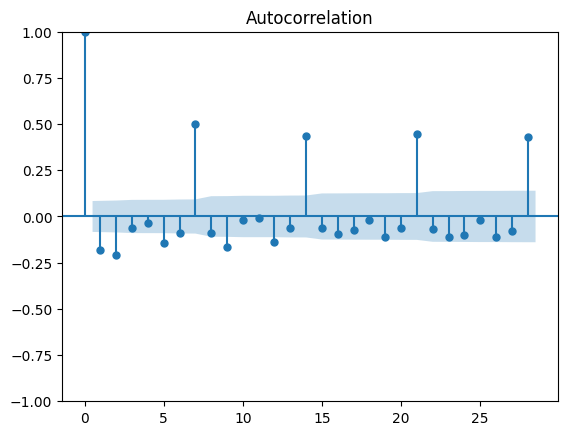

In [73]:
plot_acf(pvt['de'].diff().dropna());

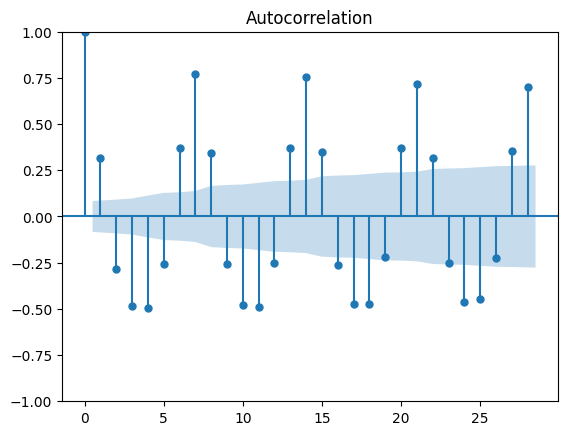

In [74]:
plot_acf(pvt['es'].diff().dropna());

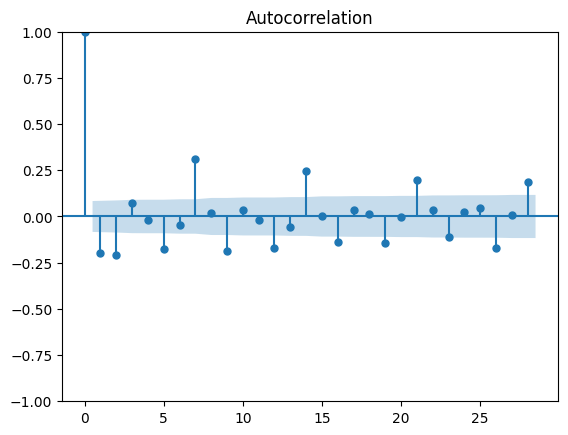

In [75]:
plot_acf(pvt['fr'].diff().dropna());

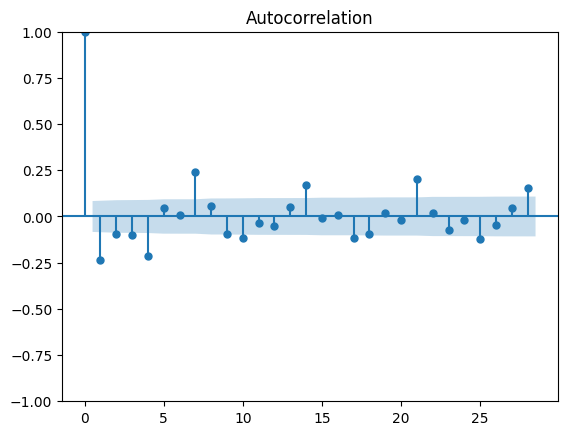

In [76]:
plot_acf(pvt['ja'].diff().dropna());

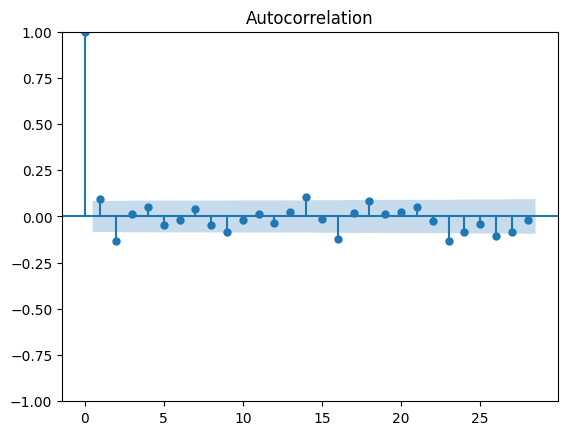

In [77]:
plot_acf(pvt['ru'].diff().dropna());

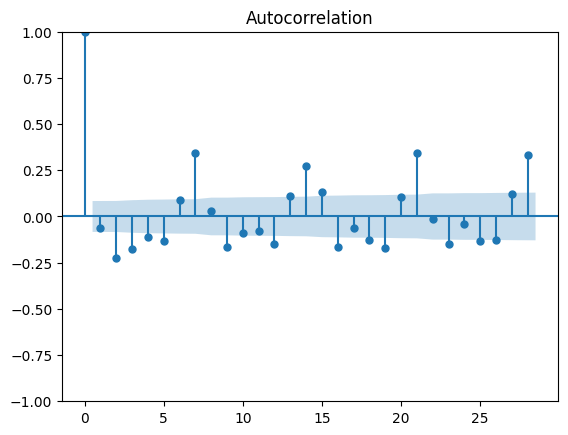

In [78]:
plot_acf(pvt['zh'].diff().dropna());

acf plot for most languages shows high correlation for 7 , thus window size should be 7, and for ru highest correlation shown by 2 so for ru window size of 2 is optimum.

PACF plot with original time series without de-trending and de-seasoning.

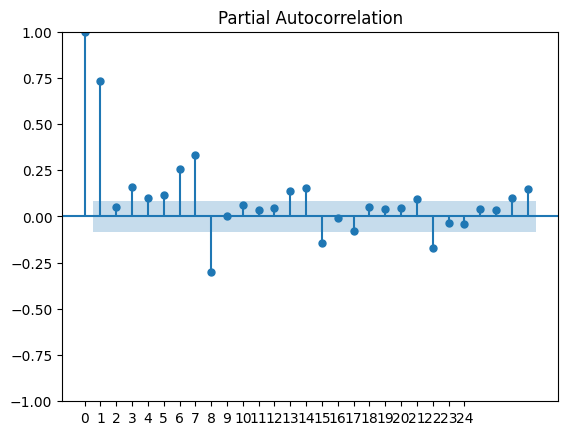

In [79]:
plot_pacf(pvt['de']);
plt.xticks(range(25))
plt.show()

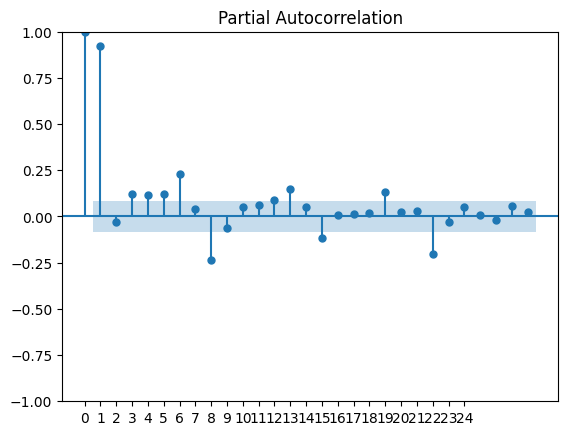

In [80]:
plot_pacf(pvt['en']);
plt.xticks(range(25))
plt.show()

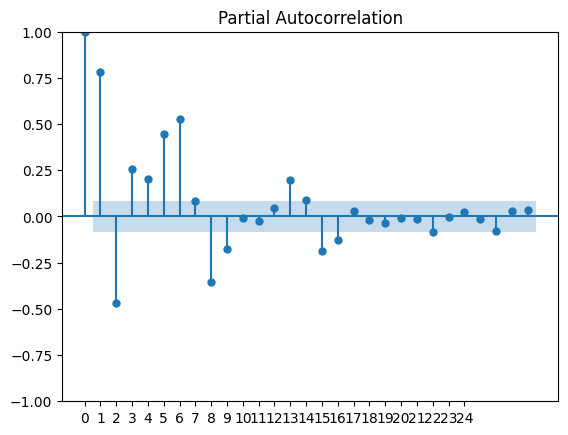

In [81]:
plot_pacf(pvt['es']);
plt.xticks(range(25))
plt.show()

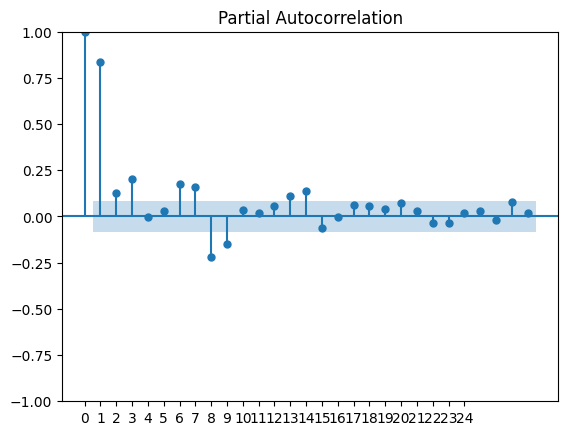

In [82]:
plot_pacf(pvt['fr']);
plt.xticks(range(25))
plt.show()

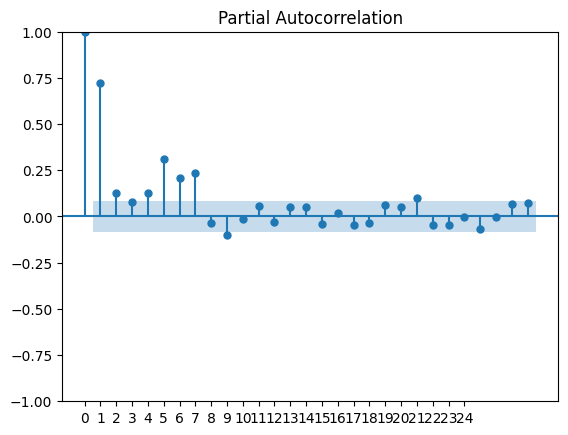

In [83]:
plot_pacf(pvt['ja']);
plt.xticks(range(25))
plt.show()

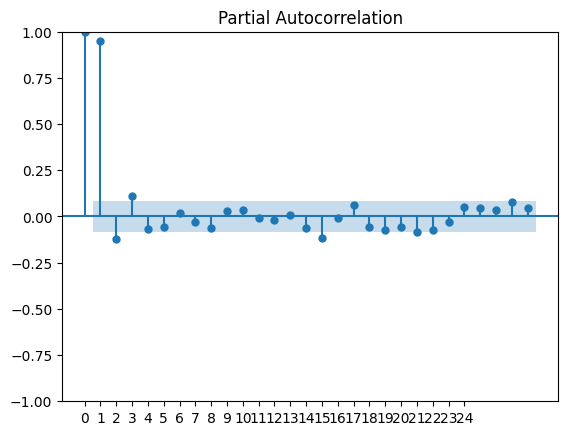

In [84]:
plot_pacf(pvt['ru']);
plt.xticks(range(25))
plt.show()

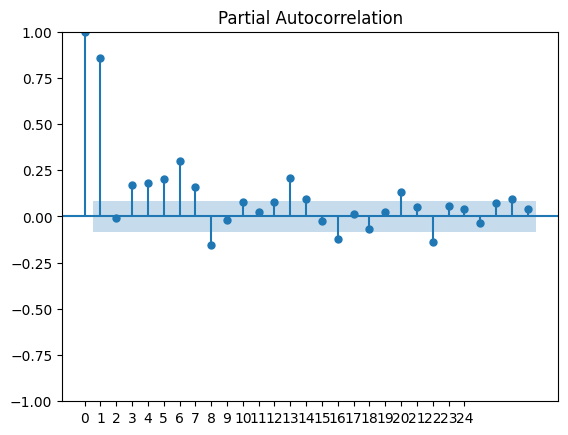

In [85]:
plot_pacf(pvt['zh']);
plt.xticks(range(25))
plt.show()

PACF plots, on the other hand, show the correlation between a time series and its lagged values. Here also PACF for most of the languages are close to 7.

Data splitting

In [86]:
train_x = pvt.loc[pvt.index < pvt.index[-30]].copy()
test_x = pvt.loc[pvt.index >= pvt.index[-30]].copy()
test_x.shape

(30, 7)

ARIMA model

Creating and training the Arima model with p and q from ACF and PACF plots

Language de

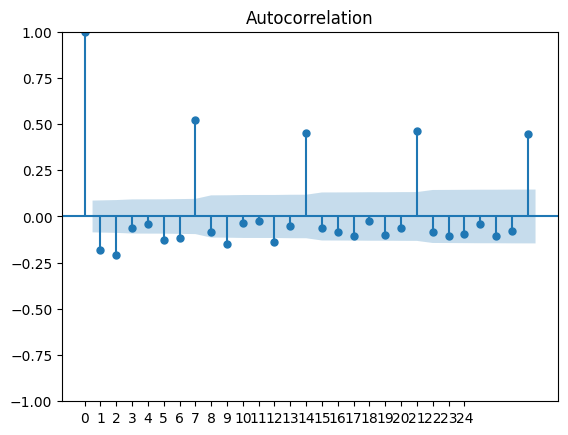

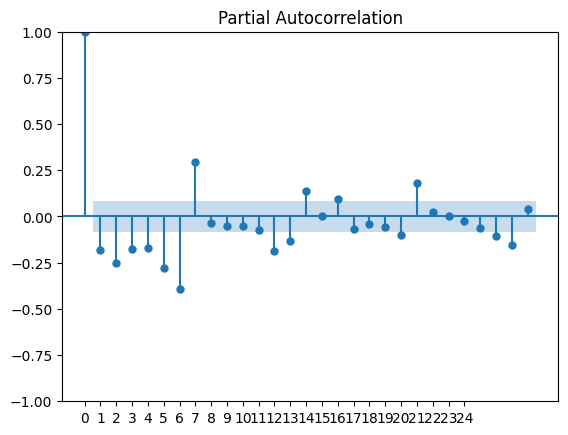

In [87]:
plot_acf(train_x['de'].diff().dropna());
plt.xticks(range(25))
plot_pacf(train_x['de'].diff().dropna());
plt.xticks(range(25))
plt.show()

From above p=7 and q=2

In [88]:
adf_test(train_x['de'].diff().dropna())

2.1740786473912637e-10
Sequence is stationary


Thus d=0

In [89]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MAE : 1434295.715
RMSE : 2256776.036
MAPE: 0.077


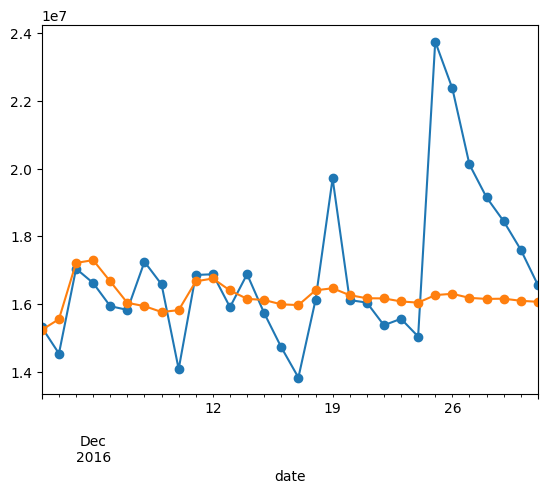

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p=7
q=2
d=0

model = SARIMAX(train_x['de'], order=(p, d, q))
model = model.fit(disp=False)
test_x['pred_de'] = model.forecast(steps=30)
test_x['de'].plot(style='-o')
test_x['pred_de'].plot(style='-o')
performance(test_x['de'], test_x['pred_de'])


Language en

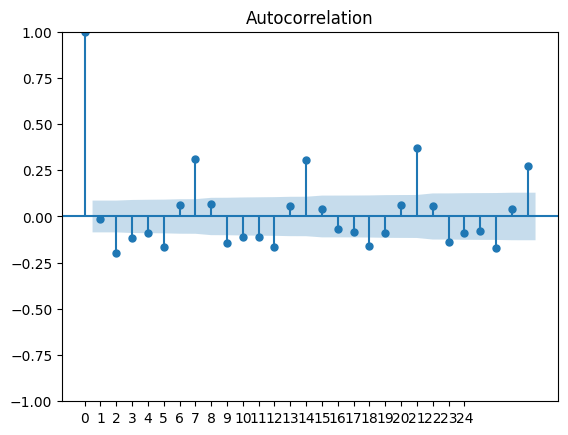

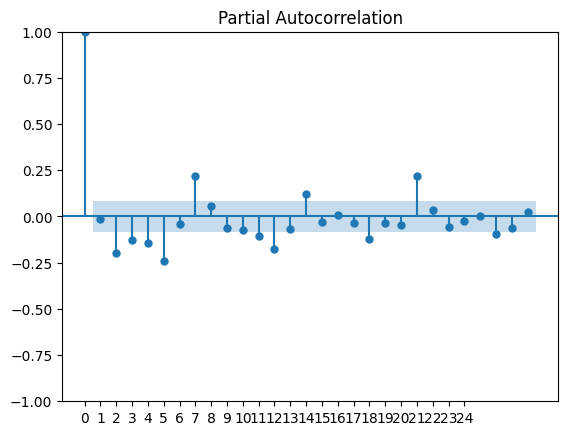

In [91]:
plot_acf(train_x['en'].diff().dropna());
plt.xticks(range(25))
plot_pacf(train_x['en'].diff().dropna());
plt.xticks(range(25))
plt.show()

From above p=5 and q=4

In [92]:
adf_test(train_x['en'].diff().dropna())

4.8517710038657013e-11
Sequence is stationary


Thus d=0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 9414707.394
RMSE : 13217219.804
MAPE: 0.072


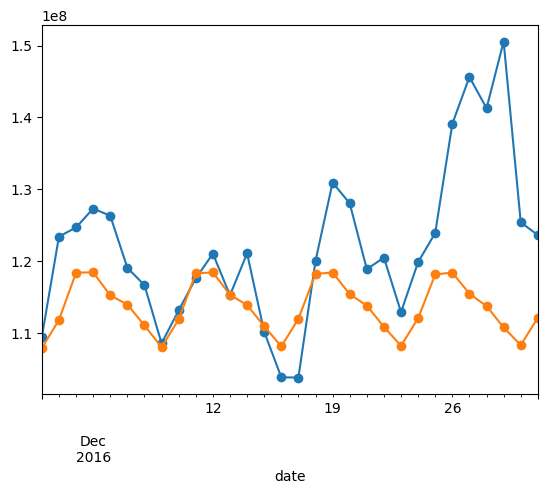

In [93]:
p=5
q=4
d=0

model = SARIMAX(train_x['en'], order=(p, d, q))
model = model.fit(disp=False)
test_x['pred_en'] = model.forecast(steps=30)
test_x['en'].plot(style='-o')
test_x['pred_en'].plot(style='-o')
performance(test_x['en'], test_x['pred_en'])

Language es

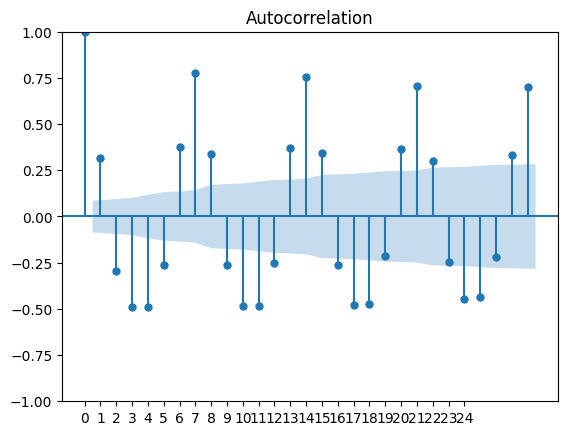

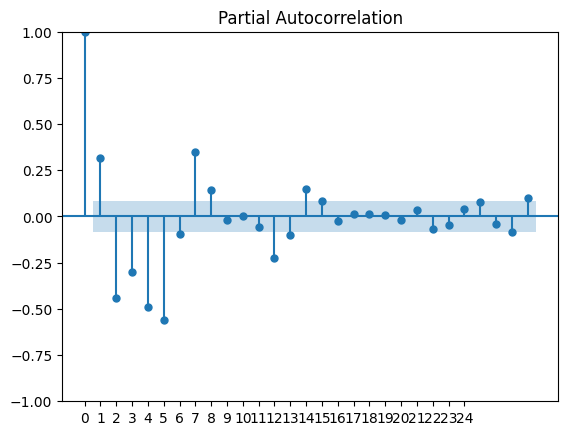

In [94]:
plot_acf(train_x['es'].diff().dropna());
plt.xticks(range(25))
plot_pacf(train_x['es'].diff().dropna());
plt.xticks(range(25))
plt.show()

from above p=5, q=18

In [96]:
adf_test(train_x['es'].diff().dropna())

1.5697458998717964e-07
Sequence is stationary


Thus d=0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 3121296.335
RMSE : 3341705.988
MAPE: 0.218


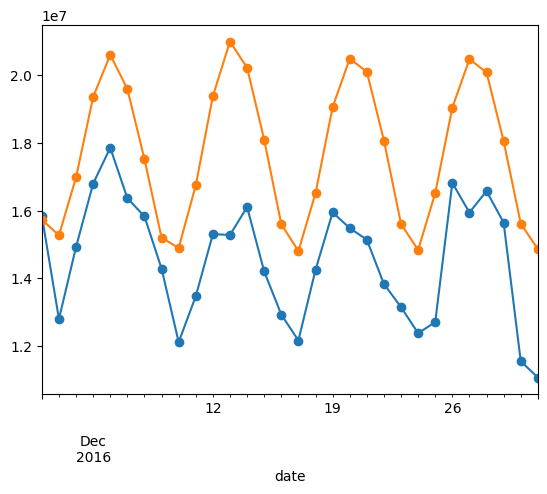

In [97]:
p=5
q=18
d=0

model = SARIMAX(train_x['es'], order=(p, d, q))
model = model.fit(disp=False)
test_x['pred_es'] = model.forecast(steps=30)
test_x['es'].plot(style='-o')
test_x['pred_es'].plot(style='-o')
performance(test_x['es'], test_x['pred_es'])

Language fr

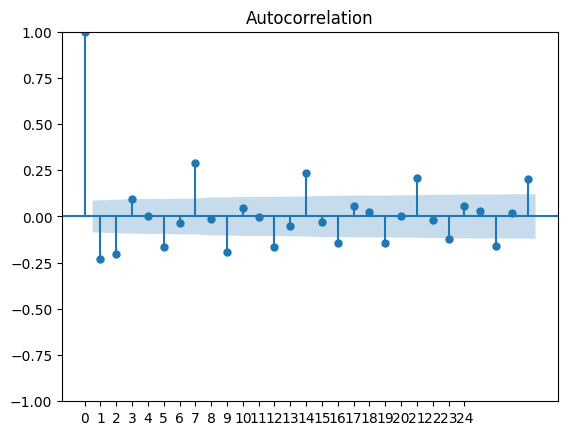

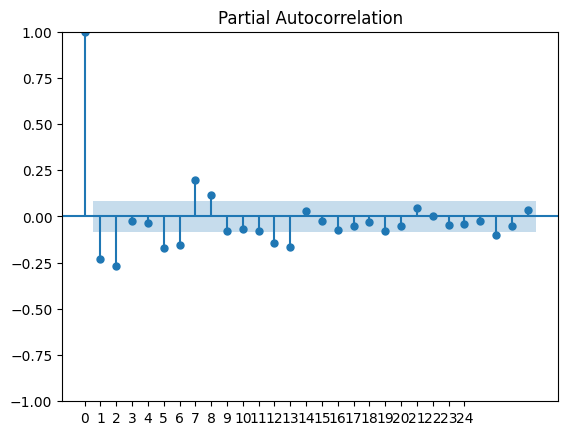

In [98]:
plot_acf(train_x['fr'].diff().dropna());
plt.xticks(range(25))
plot_pacf(train_x['fr'].diff().dropna());
plt.xticks(range(25))
plt.show()

From above p=1 and q is not clear from above so we take q=5

In [99]:
adf_test(train_x['fr'].diff().dropna())

4.814818268507198e-17
Sequence is stationary


Thus d=0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 1066331.955
RMSE : 1562648.774
MAPE: 0.077


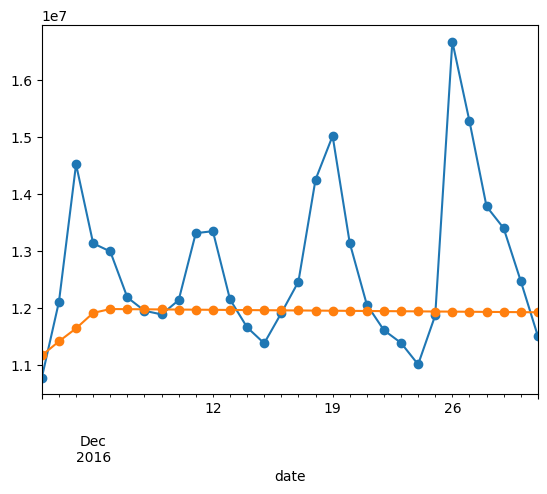

In [100]:
p=1
q=5
d=0

model = SARIMAX(train_x['fr'], order=(p, d, q))
model = model.fit(disp=False)
test_x['pred_fr'] = model.forecast(steps=30)
test_x['fr'].plot(style='-o')
test_x['pred_fr'].plot(style='-o')
performance(test_x['fr'], test_x['pred_fr'])

Language ja

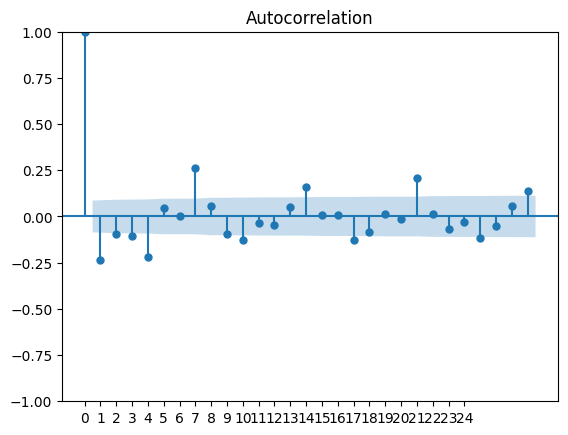

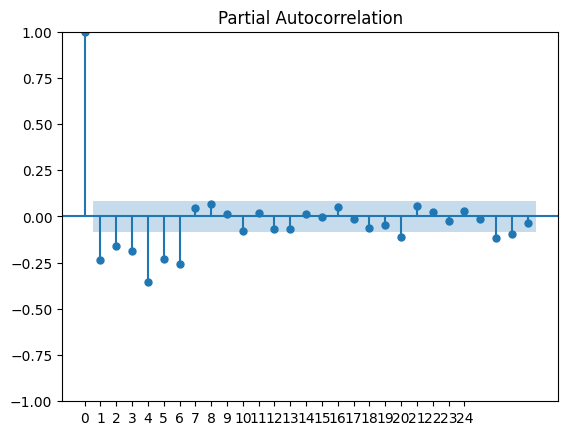

In [101]:
plot_acf(train_x['ja'].diff().dropna());
plt.xticks(range(25))
plot_pacf(train_x['ja'].diff().dropna());
plt.xticks(range(25))
plt.show()

In [ ]:
From above p=6 and q= 5

In [102]:
adf_test(train_x['ja'].diff().dropna())

0.0
Sequence is stationary


Thus d=0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 1405583.413
RMSE : 2164528.628
MAPE: 0.078


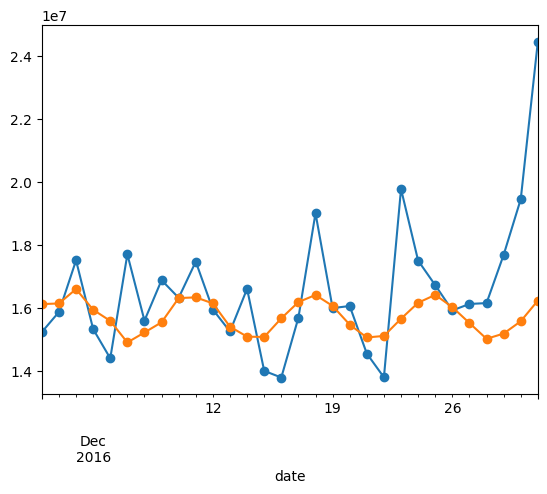

In [103]:
p=6
q=5
d=0

model = SARIMAX(train_x['ja'], order=(p, d, q))
model = model.fit(disp=False)
test_x['pred_ja'] = model.forecast(steps=30)
test_x['ja'].plot(style='-o')
test_x['pred_ja'].plot(style='-o')
performance(test_x['ja'], test_x['pred_ja'])

Language ru

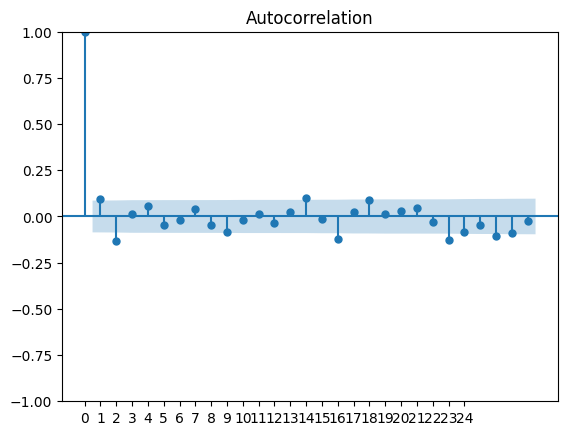

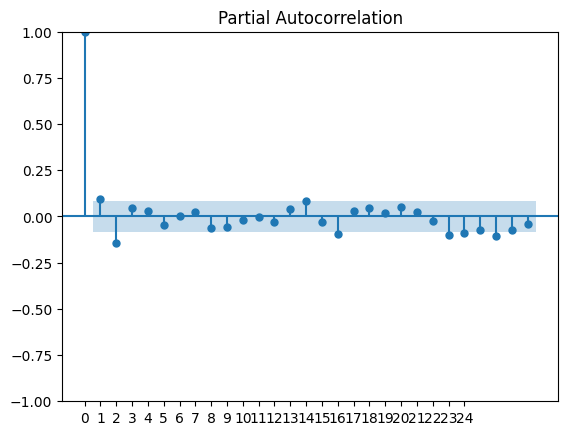

In [104]:
plot_acf(train_x['ru'].diff().dropna());
plt.xticks(range(25))
plot_pacf(train_x['ru'].diff().dropna());
plt.xticks(range(25))
plt.show()

From above p=1 or 2 or 0 and q= 0 or 1 or 2

In [105]:
adf_test(train_x['ru'].diff().dropna())

3.879608765875108e-30
Sequence is stationary


Thus d=0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 811825.27
RMSE : 1153839.067
MAPE: 0.054


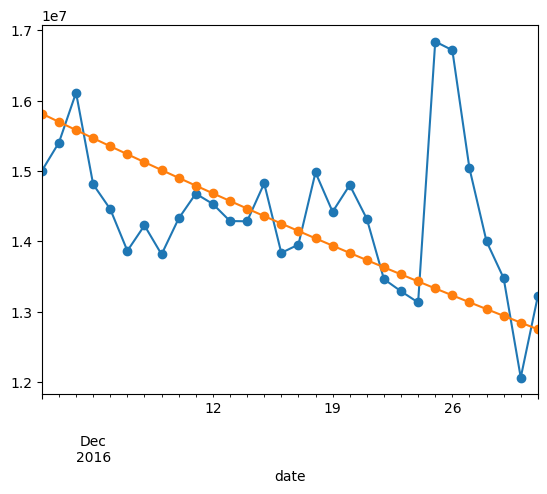

In [106]:
p=1
q=0
d=0

model = SARIMAX(train_x['ru'], order=(p, d, q))
model = model.fit(disp=False)
test_x['pred_ru'] = model.forecast(steps=30)
test_x['ru'].plot(style='-o')
test_x['pred_ru'].plot(style='-o')
performance(test_x['ru'], test_x['pred_ru'])

Language zh

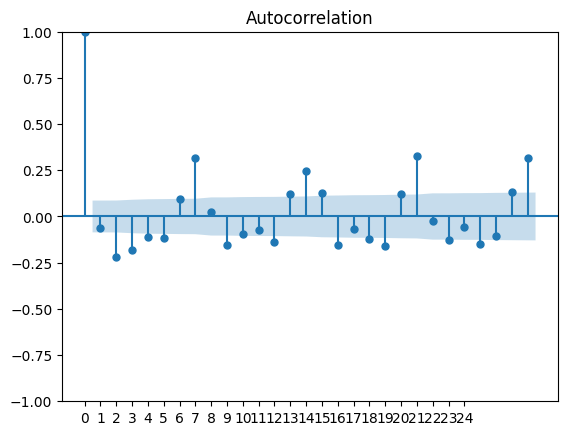

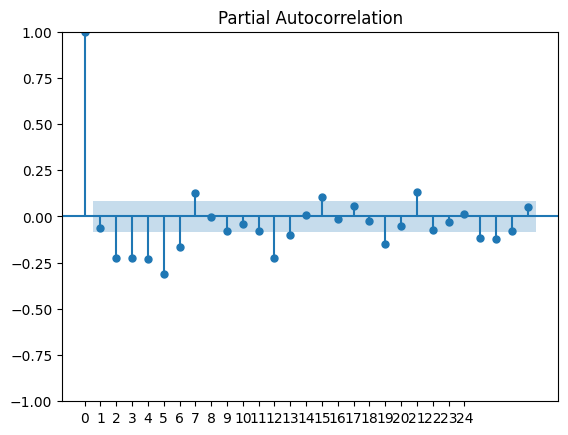

In [107]:
plot_acf(train_x['zh'].diff().dropna());
plt.xticks(range(25))
plot_pacf(train_x['zh'].diff().dropna());
plt.xticks(range(25))
plt.show()

In [ ]:
From above p= 0 or 6 or 7 and q=0 or 3 or 4

In [108]:
adf_test(train_x['zh'].diff().dropna())

3.392815784477995e-11
Sequence is stationary


Thus d=0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


MAE : 284043.594
RMSE : 361792.793
MAPE: 0.046


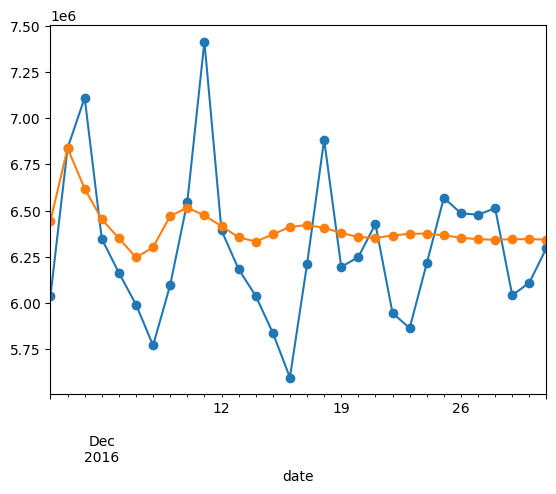

In [109]:
p=6
q=0
d=0

model = SARIMAX(train_x['zh'], order=(p, d, q))
model = model.fit(disp=False)
test_x['pred_zh'] = model.forecast(steps=30)
test_x['zh'].plot(style='-o')
test_x['pred_zh'].plot(style='-o')
performance(test_x['zh'], test_x['pred_zh'])

### SARIMAX model

Use exogenous variable with sarimax

In [110]:
!gdown 19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE

Downloading...
From: https://drive.google.com/uc?id=19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE
To: /content/Exog_Campaign_eng
100% 1.10k/1.10k [00:00<00:00, 2.89MB/s]


In [111]:
ex=pd.read_csv("/content/Exog_Campaign_eng")

In [112]:
ex

,Exog
0,0
1,0
2,0
3,0
4,0
...,...
545,1
546,1
547,1
548,0


In [113]:
pvt["en"]

date
2015-07-01     84712190.0
2015-07-02     84438545.0
2015-07-03     80167728.0
2015-07-04     83463204.0
2015-07-05     86198637.0
                 ...     
2016-12-27    145628731.0
2016-12-28    141278366.0
2016-12-29    150557534.0
2016-12-30    125404585.0
2016-12-31    123623809.0
Name: en, Length: 550, dtype: float64

In [118]:
final_df = pd.concat([pvt_df,ex], axis= 1)
final_df

,date,commons,de,en,es,fr,ja,ru,www,zh,Exog
0,2015-07-01,1140821.0,13260519.0,84712190.0,15278553.0,8458638.0,11863200.0,9463854.0,349713.0,4144988.0,0
1,2015-07-02,1178130.0,13079896.0,84438545.0,14601013.0,8512952.0,13620792.0,9627643.0,383680.0,4151189.0,0
2,2015-07-03,1150547.0,12554042.0,80167728.0,13427632.0,8186030.0,12305383.0,8923463.0,325714.0,4123659.0,0
3,2015-07-04,951317.0,11520379.0,83463204.0,12606538.0,8749842.0,15456239.0,8393214.0,308756.0,4163448.0,0
4,2015-07-05,1058036.0,13392347.0,86198637.0,13710356.0,8590493.0,14827204.0,8938528.0,338485.0,4441286.0,0
...,...,...,...,...,...,...,...,...,...,...,...
545,2016-12-27,2305363.0,20125264.0,145628731.0,15945353.0,15281470.0,16123301.0,15040168.0,320017.0,6478442.0,1
546,2016-12-28,2599015.0,19152389.0,141278366.0,16577375.0,13781521.0,16150715.0,14000319.0,729836.0,6513400.0,1
547,2016-12-29,2309293.0,18447906.0,150557534.0,15647135.0,13399796.0,17682688.0,13478977.0,320695.0,6042545.0,1
548,2016-12-30,2506163.0,17606030.0,125404585.0,11560095.0,12471074.0,19450687.0,12066750.0,431709.0,6111203.0,0


In [119]:
final_df.columns.name

In [120]:
final_df.columns.name=None

In [123]:
final_df.set_index('date', inplace=True)

In [125]:
final_df

,commons,de,en,es,fr,ja,ru,www,zh,Exog
date,,,,,,,,,,
2015-07-01,1140821.0,13260519.0,84712190.0,15278553.0,8458638.0,11863200.0,9463854.0,349713.0,4144988.0,0
2015-07-02,1178130.0,13079896.0,84438545.0,14601013.0,8512952.0,13620792.0,9627643.0,383680.0,4151189.0,0
2015-07-03,1150547.0,12554042.0,80167728.0,13427632.0,8186030.0,12305383.0,8923463.0,325714.0,4123659.0,0
2015-07-04,951317.0,11520379.0,83463204.0,12606538.0,8749842.0,15456239.0,8393214.0,308756.0,4163448.0,0
2015-07-05,1058036.0,13392347.0,86198637.0,13710356.0,8590493.0,14827204.0,8938528.0,338485.0,4441286.0,0
...,...,...,...,...,...,...,...,...,...,...
2016-12-27,2305363.0,20125264.0,145628731.0,15945353.0,15281470.0,16123301.0,15040168.0,320017.0,6478442.0,1
2016-12-28,2599015.0,19152389.0,141278366.0,16577375.0,13781521.0,16150715.0,14000319.0,729836.0,6513400.0,1
2016-12-29,2309293.0,18447906.0,150557534.0,15647135.0,13399796.0,17682688.0,13478977.0,320695.0,6042545.0,1


In [127]:
train = final_df.iloc[:520]
test = final_df.iloc[520:]


In [129]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Fit SAR Model
model = SARIMAX(train['en'],
                seasonal_order=(1,0,1,7))
results = model.fit()
fc = results.forecast(42)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [130]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end)

MAE : 10421245.154
RMSE : 14213318.748
MAPE: 0.08


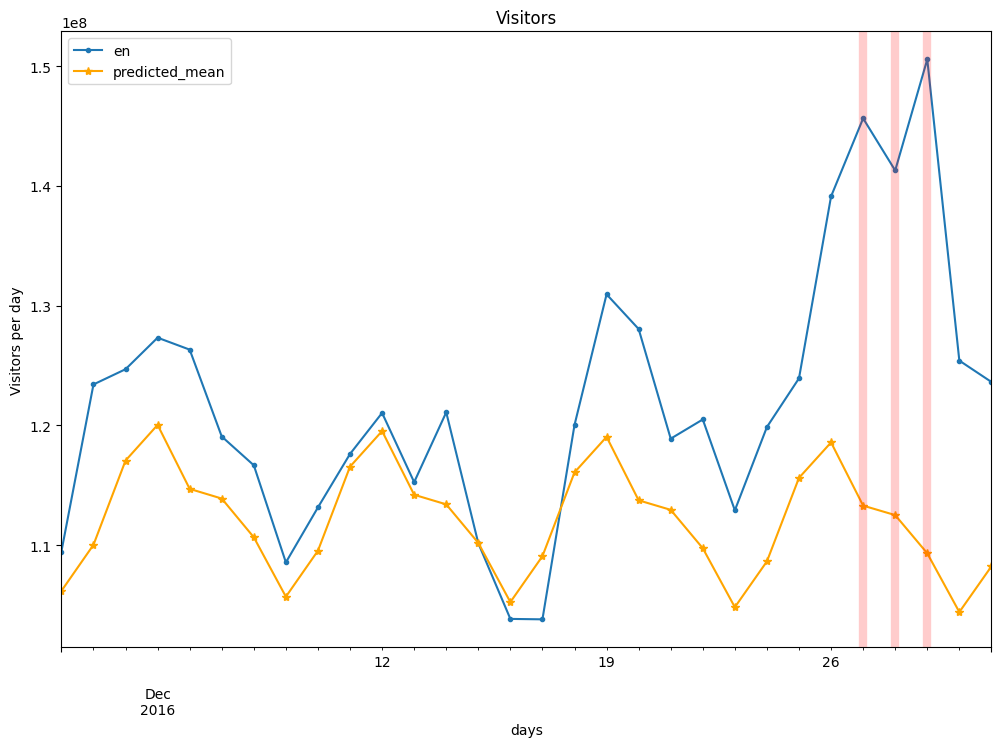

In [133]:
performance(test['en'], predictions)
# Plot predictions against known values
title='Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['en'].plot(legend=True,figsize=(12,8),title=title, style = ".-")
predictions.plot(legend=True,color = 'orange', style = '-*')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('Exog==1').index:
    ax.axvline(x=x, color='red', alpha = 0.2, linewidth = 6)

Now we use Exogeneous Variable exog

In [162]:
model = SARIMAX(train['en'],
                exog=train['Exog'],
                order=(3,2,2),
                seasonal_order=(1,0,1,7),
                )
# Train Model
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [163]:
exog_forecast = test[['Exog']]  # requires two brackets to yield a shape of (50,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('Predictions')

MAE : 6027528.197
RMSE : 7562658.373
MAPE: 0.048


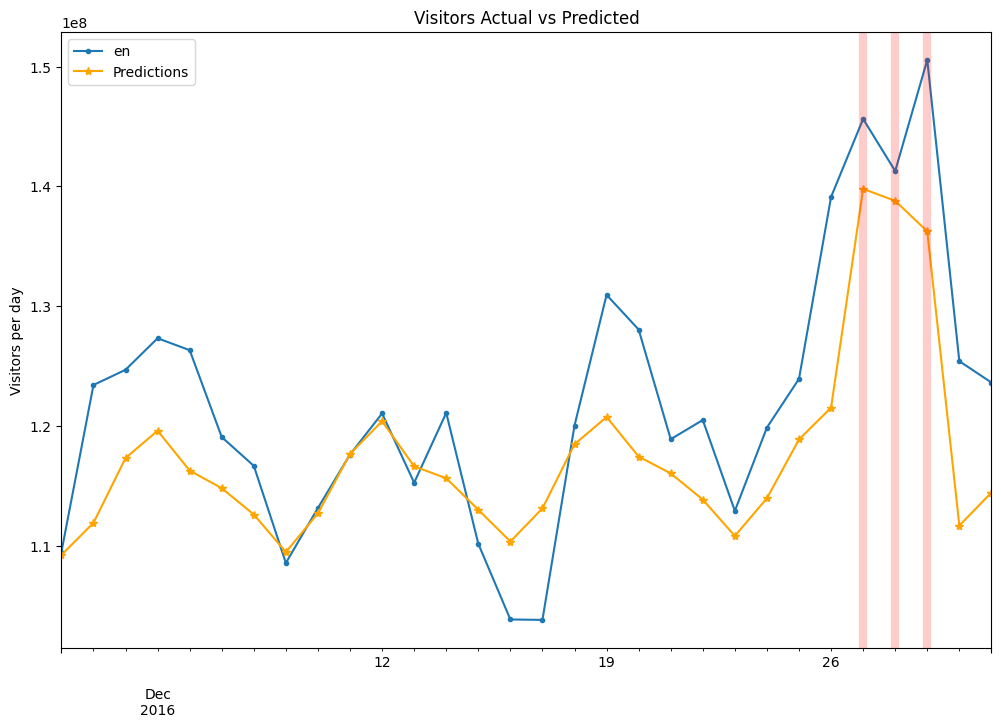

In [164]:
performance(test['en'], predictions)
# Plot predictions against known values
title='Visitors Actual vs Predicted'
ylabel='Visitors per day'
xlabel=''

ax = test['en'].plot(legend=True,figsize=(12,8),title=title, style = ".-")
predictions.plot(legend=True, color = 'orange', style = '-*')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('Exog==1').index:
    ax.axvline(x=x, color='red', alpha = 0.2, linewidth = 6);

**Facebook** **Prophet**

In [165]:
from prophet import Prophet

In [166]:
pvt_df

LANGUAGE,date,commons,de,en,es,fr,ja,ru,www,zh
0,2015-07-01,1140821.0,13260519.0,84712190.0,15278553.0,8458638.0,11863200.0,9463854.0,349713.0,4144988.0
1,2015-07-02,1178130.0,13079896.0,84438545.0,14601013.0,8512952.0,13620792.0,9627643.0,383680.0,4151189.0
2,2015-07-03,1150547.0,12554042.0,80167728.0,13427632.0,8186030.0,12305383.0,8923463.0,325714.0,4123659.0
3,2015-07-04,951317.0,11520379.0,83463204.0,12606538.0,8749842.0,15456239.0,8393214.0,308756.0,4163448.0
4,2015-07-05,1058036.0,13392347.0,86198637.0,13710356.0,8590493.0,14827204.0,8938528.0,338485.0,4441286.0
...,...,...,...,...,...,...,...,...,...,...
545,2016-12-27,2305363.0,20125264.0,145628731.0,15945353.0,15281470.0,16123301.0,15040168.0,320017.0,6478442.0
546,2016-12-28,2599015.0,19152389.0,141278366.0,16577375.0,13781521.0,16150715.0,14000319.0,729836.0,6513400.0
547,2016-12-29,2309293.0,18447906.0,150557534.0,15647135.0,13399796.0,17682688.0,13478977.0,320695.0,6042545.0
548,2016-12-30,2506163.0,17606030.0,125404585.0,11560095.0,12471074.0,19450687.0,12066750.0,431709.0,6111203.0


In [168]:
df = final_df.copy()

df['ds'] = pd.to_datetime(df['date'])
df['y'] = df['en']
df = df[['ds', 'y', 'Exog']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      550 non-null    datetime64[ns]
 1   y       550 non-null    float64       
 2   Exog    550 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 13.0 KB


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg45jr_v4/m44lzz87.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg45jr_v4/tbtr5p38.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16339', 'data', 'file=/tmp/tmpg45jr_v4/m44lzz87.json', 'init=/tmp/tmpg45jr_v4/tbtr5p38.json', 'output', 'file=/tmp/tmpg45jr_v4/prophet_model74y_urfo/prophet_model-20240513054601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:46:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:46:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


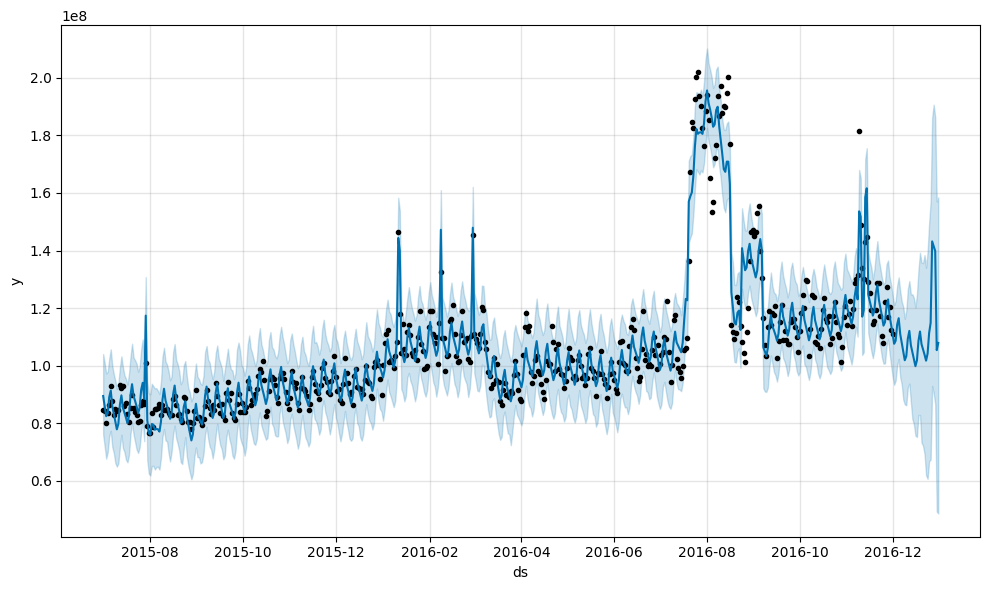

In [172]:
model1=Prophet(interval_width=0.95,
               yearly_seasonality=True,
               weekly_seasonality=True,
               changepoint_prior_scale=4) # default = 0.05

# Add Exogeneous Variable
model1.add_regressor('Exog') #adding holidays data in the model3

# train Model
model1.fit(df[:-30])

# predict
forecast1 = model1.predict(df)

# plot
fig = model1.plot(forecast1)

In [173]:
performance(df['y'][:-30],forecast1['yhat'][:-30])

MAE : 4580500.389
RMSE : 7096367.619
MAPE: 0.04


**INSIGHTS**

**Arima** Model for Different Language Pages Summary
*   MAPE for de: 0.077
*   MAPE for en: 0.072
*   MAPE for es: 0.218
*   MAPE for fr: 0.077
*   MAPE for ja: 0.078
*   MAPE for ru: 0.054
*   MAPE for zh: 0.046

**Sarimax** model for en as exogeneous variable was available for en only
*   MAPE for en without exog: 0.08
*   MAPE for en with exog :0.048

**Facebook Prophet** model for en with exog
*   MAPE: 0.04

Best MAPE value is achieved by Facebook Prophet for english pages of 0.04











**Creating a pipeline for working with multiple series**

In [178]:
auto_df=final_df.copy()

In [179]:
auto_df.drop(columns=["commons","www"], inplace=True)


In [181]:
train_df = auto_df[:520]
test_df = auto_df[520:]

In [180]:
auto_df.columns[1:]

Index(['de', 'en', 'es', 'fr', 'ja', 'ru', 'zh', 'Exog'], dtype='object')

In [185]:
import pmdarima as pm

In [187]:
for i in auto_df.columns[1:]:
  print("Performance Metrics after Auto Arima for ",i)
  model = pm.auto_arima(train_df[i], exogenous = train_df['Exog'],seasonal=True, m=12)
  forecasts = model.predict(test_df.shape[0],exogenous = test_df['Exog'])
  performance(test_df[i], forecasts)
  print('-'*50)

Performance Metrics after Auto Arima for  de
MAE : 1268451.247
RMSE : 1988782.649
MAPE: 0.07
--------------------------------------------------
Performance Metrics after Auto Arima for  en
MAE : 8615676.484
RMSE : 12234769.177
MAPE: 0.066
--------------------------------------------------
Performance Metrics after Auto Arima for  es
MAE : 3562597.19
RMSE : 3706827.662
MAPE: 0.252
--------------------------------------------------
Performance Metrics after Auto Arima for  fr
MAE : 1252042.663
RMSE : 1756020.975
MAPE: 0.09
--------------------------------------------------
Performance Metrics after Auto Arima for  ja
MAE : 1406325.827
RMSE : 2087894.755
MAPE: 0.079
--------------------------------------------------
Performance Metrics after Auto Arima for  ru
MAE : 1745454.986
RMSE : 1934534.674
MAPE: 0.125
--------------------------------------------------
Performance Metrics after Auto Arima for  zh
MAE : 355601.537
RMSE : 403892.307
MAPE: 0.058
----------------------------------------

# **Questionnaire:**

**1. Defining the problem statements and where can this and modifications of this be used ?**

1.To forecast the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

The modification of this can be utilized in the event of any organisation's promoting. If the organisation will open it's branches in various areas, the best time and greatest computerized adv capital (on english pages, can be perceived).

**2.Write 3 inferences you made from the data visualizations**

1. en pages gets the most traffic and es gets least.

2. all-access type distribution is preferred mainly.

3. all-agents distribution pages are most compared to spider origin webpage.

**3. What does the decomposition of series do?**

The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns


**4.What level of differencing gave you a stationary series?**

One level of differencing gave me a stationary series

**5.Difference between arima, sarima & sarimax**

ARIMA -> Differencing and residual smoothing are considered with order of differentiation ( p,d,q)

SARIMA -> Along with above parameters as in ARIMA, seasonality(s) and the seasonality effect on Differencing (detrending) , residual smoothing ( moving average) and order of derivative is considered (p,q,d,P,Q,D,s)

SARIMAX -> Along with SARIMA's parameters, changes due to external/exogenous factors are also considered (p,q,d,P,Q,D,s,exog)

**6.Compare the number of views in different languages**

en webpages are the mostly viewed and es are least

The language with least MAPE will give mor confidance for a company if the advertising agency is forecasting then they will have least amount of loss in ad placements on the language with lest MAPE.


**7.What other methods other than grid search would be suitable to get the model
for all languages**

Auto ARIMA, confidence interval detection, FB Prophet are the other methods other than hyper parameter tuning ( grid search) that would be suitable to get the model for all languages